In [2]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('train.csv')
df.info()
df=df.drop(columns=['id','Unnamed: 0'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  750000 non-null  int64  
 1   id          750000 non-null  int64  
 2   Sex         750000 non-null  int64  
 3   Age         750000 non-null  int64  
 4   Height      750000 non-null  float64
 5   Weight      750000 non-null  float64
 6   Duration    750000 non-null  float64
 7   Heart_Rate  750000 non-null  float64
 8   Body_Temp   750000 non-null  float64
 9   Calories    750000 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 57.2 MB


## 特征说明
id 记录编号或用户编号
Sex 性别 0为男 1为女
Age 年龄
Height 身高（单位为 cm ）
Weight 体重（单位为 kg）
Duration  运动持续时间（分钟）
Heart_Rate 运动时的心率（BPM，心跳次数/分钟）
Body_Temp 运动时的体温（单位为 摄氏度 ）
Calories 运动过程中消耗的热量（通常以千卡 kcal 为单位）

## 数据集分割

In [4]:
df_male=df[df['Sex']==0]
df_female=df[df['Sex']==1]
df_male.info()
df_female.info()


<class 'pandas.core.frame.DataFrame'>
Index: 374279 entries, 0 to 749998
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         374279 non-null  int64  
 1   Age         374279 non-null  int64  
 2   Height      374279 non-null  float64
 3   Weight      374279 non-null  float64
 4   Duration    374279 non-null  float64
 5   Heart_Rate  374279 non-null  float64
 6   Body_Temp   374279 non-null  float64
 7   Calories    374279 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 25.7 MB
<class 'pandas.core.frame.DataFrame'>
Index: 375721 entries, 1 to 749999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         375721 non-null  int64  
 1   Age         375721 non-null  int64  
 2   Height      375721 non-null  float64
 3   Weight      375721 non-null  float64
 4   Duration    375721 non-null  float64
 5   Heart_Rate  375721 n

## 绘制相关热图

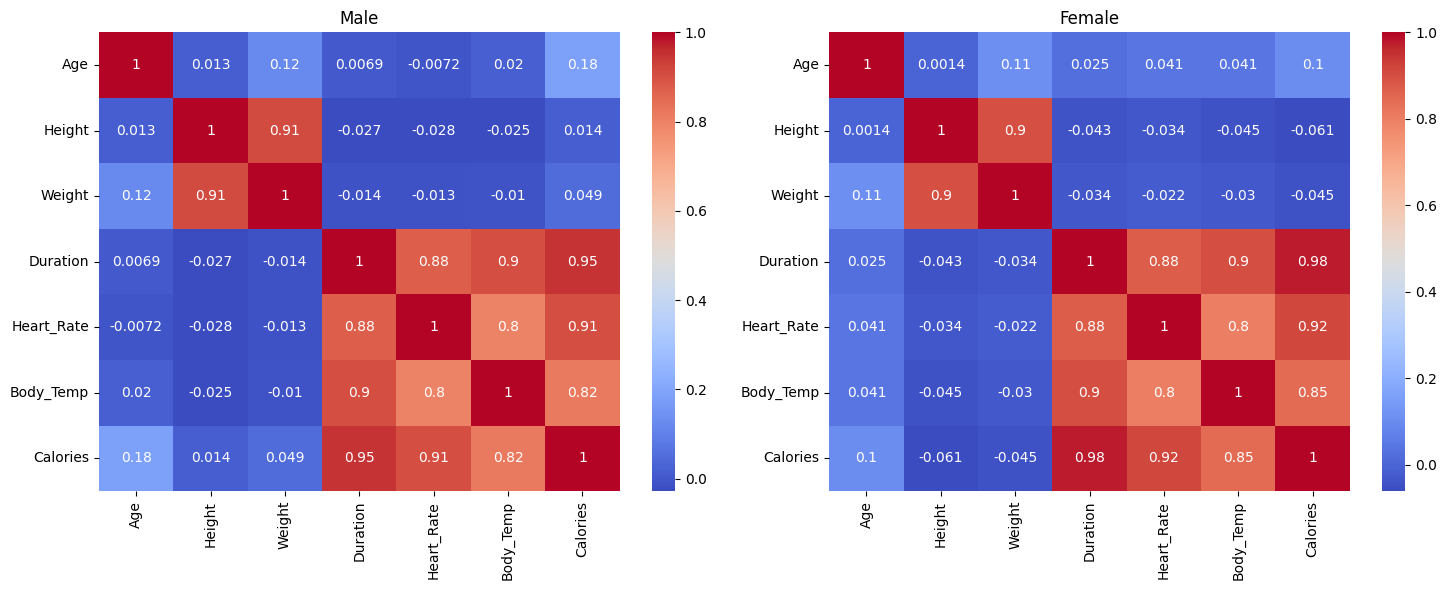

In [5]:
# 创建一个1x2的子图布局
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 在左侧子图绘制男性数据的热图
sns.heatmap(df_male.drop(columns=['Sex']).corr(), 
            annot=True, 
            cmap='coolwarm',  # 使用coolwarm颜色映射，从冷色调到暖色调
            ax=ax1)
ax1.set_title('Male')

# 在右侧子图绘制女性数据的热图
sns.heatmap(df_female.drop(columns=['Sex']).corr(), 
            annot=True, 
            cmap='coolwarm',  # 使用相同的coolwarm颜色映射
            ax=ax2)
ax2.set_title('Female')
# 调整子图之间的间距
plt.tight_layout()
plt.show()

## 图像分析
- 身高与体重有0.9左右的正相关
- 心率、体温与热量消耗间的相关性在0.8-0.9
- 运动时间和心率与热量消耗间的相关性最显著
- 各指标在女性中的相关性更好

## 查看数据分布

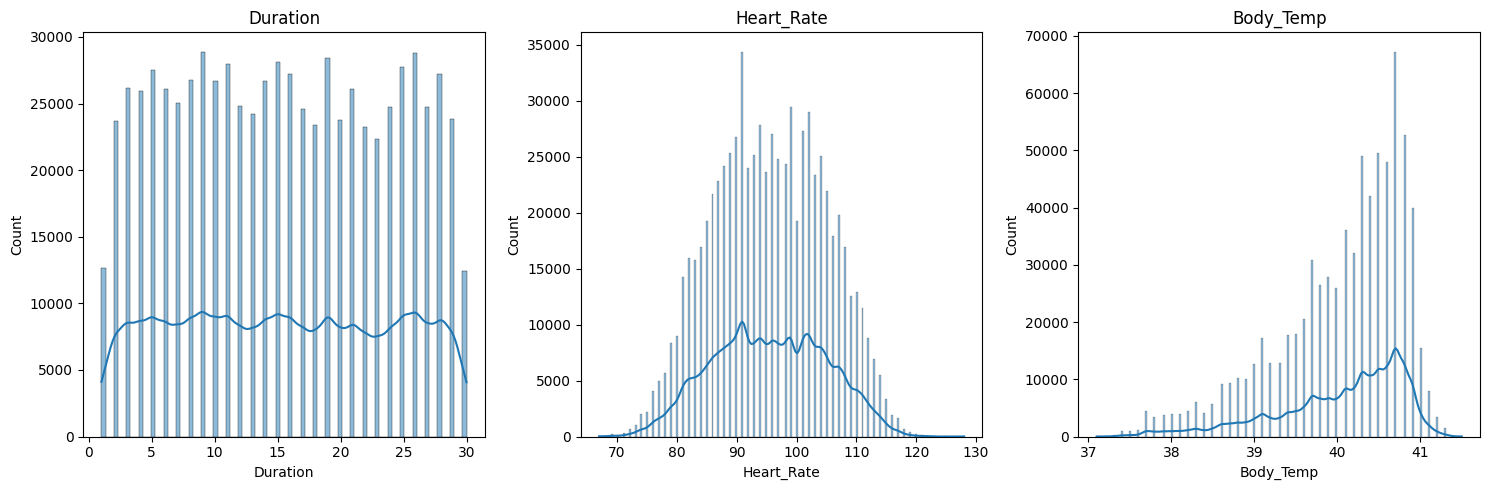

In [6]:
# 创建一个1x3的子图布局，用于展示三个指标的分布
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 绘制运动时间(Duration)的分布
sns.histplot(data=df, x='Duration', kde=True, ax=axes[0])
axes[0].set_title('Duration')
axes[0].set_xlabel('Duration')

# 绘制心率(Heart_rate)的分布
sns.histplot(data=df, x='Heart_Rate', kde=True, ax=axes[1])
axes[1].set_title('Heart_Rate')
axes[1].set_xlabel('Heart_Rate')

# 绘制体温(Body_Temp)的分布
sns.histplot(data=df, x='Body_Temp', kde=True, ax=axes[2])
axes[2].set_title('Body_Temp')  
axes[2].set_xlabel('Body_Temp')

# 调整子图之间的间距
plt.tight_layout()
plt.show()


- 运动时间分布平均，主要集中在5-28分钟
- 心率分布呈现正态分布，集中在90-100次
- 体温分布长尾在左，整体偏于高体温

## 模型构建

In [7]:
from sklearn.model_selection import train_test_split
train_data,val_data=train_test_split(df,test_size=0.1,random_state=66)

In [8]:
# 导入必要的库
from autogluon.tabular import TabularPredictor
import pandas as pd
import numpy as np

# 设置目标变量和特征
label = 'Calories'  # 目标变量
features = ['Duration', 'Heart_Rate', 'Body_Temp']  # 特征变量

# 配置模型参数
model_params = {
    'GBM': [
        {
            'model': 'LightGBM',
            'num_boost_round': 1000,
            'learning_rate': 0.05
        },
        {
            'model': 'CatBoost',
            'iterations': 1000,
            'learning_rate': 0.05
        },
        {
            'model': 'XGBoost',
            'n_estimators': 1000,
            'learning_rate': 0.05
        }
    ]
}
# 创建并训练模型
light_predictor = TabularPredictor(
    label=label,
    eval_metric='rmlse',  # 使用均方根误差作为评估指标
    problem_type='regression',  # 回归问题
    path='./models/model1'
)



Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.9.21
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.4.0: Fri Apr 11 18:34:14 PDT 2025; root:xnu-11417.101.15~117/RELEASE_ARM64_T8122
CPU Count:          8
Memory Avail:       1.61 GB / 8.00 GB (20.1%)
Disk Space Avail:   10.32 GB / 228.27 GB (4.5%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then

AssertionError: Learner is already fit.

In [ ]:
# 训练模型
light_predictor.fit(
    train_data=train_data,
    hyperparameters=model_params,
    presets='best_quality' 
)


In [11]:
light_predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-3.595706,root_mean_squared_error,28.023965,179.440670,0.003895,0.274009,3,True,8
1,WeightedEnsemble_L2,-3.597074,root_mean_squared_error,20.014102,132.037840,0.004531,0.178709,2,True,4
2,LightGBM_2_BAG_L1,-3.597622,root_mean_squared_error,13.636757,92.999067,13.636757,92.999067,1,True,2
3,LightGBM_BAG_L1,-3.613949,root_mean_squared_error,6.372814,38.860063,6.372814,38.860063,1,True,1
4,LightGBM_3_BAG_L1,-3.613949,root_mean_squared_error,7.072496,34.618284,7.072496,34.618284,1,True,3
5,LightGBM_BAG_L2,-3.620551,root_mean_squared_error,28.020070,179.166661,0.938002,12.689247,2,True,5
6,LightGBM_3_BAG_L2,-3.620551,root_mean_squared_error,28.020967,181.505001,0.938900,15.027587,2,True,7
7,LightGBM_2_BAG_L2,-3.620551,root_mean_squared_error,28.026861,178.627928,0.944793,12.150513,2,True,6


In [15]:
# 获取前五个最佳模型的评估结果
top_5_models = light_predictor.leaderboard().head(5)
print("前五个最佳模型的评估结果：")
print(top_5_models)

# 对每个模型进行单独评估
for model_name in top_5_models['model']:
    print(f"\n{model_name} 模型的评估结果：")
    eval_results = light_predictor.evaluate(val_data, model=model_name)
    print(eval_results)

前五个最佳模型的评估结果：
                 model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3  -3.595706  root_mean_squared_error      28.023965  179.440670                0.003895           0.274009            3       True          8
1  WeightedEnsemble_L2  -3.597074  root_mean_squared_error      20.014102  132.037840                0.004531           0.178709            2       True          4
2    LightGBM_2_BAG_L1  -3.597622  root_mean_squared_error      13.636757   92.999067               13.636757          92.999067            1       True          2
3      LightGBM_BAG_L1  -3.613949  root_mean_squared_error       6.372814   38.860063                6.372814          38.860063            1       True          1
4    LightGBM_3_BAG_L1  -3.613949  root_mean_squared_error       7.072496   34.618284                7.072496          34.618284            1       True          3

W

In [21]:
test=pd.read_csv('test.csv')
submission = light_predictor.predict(test,model='WeightedEnsemble_L2')
submission.head()

0     27.202658
1    108.294540
2     86.805923
3    125.656296
4     75.888939
Name: Calories, dtype: float32

In [23]:
my_submission=pd.concat([test['id'],submission],axis=1)
# 将预测值小于0的部分替换为0
my_submission['Calories'] = my_submission['Calories'].clip(lower=0)

my_submission.to_csv('submission.csv',index=False)